In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)


# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 1
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
print(results.columns)
print(key_config_df.columns)

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)
    

File name: 0.yaml
{   'cpu_request': ['1', '2', '4', '8', '16'],
    'data_type': 'audio',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_variants': [   'facebook/s2t-small-librispeech-asr',
                          'facebook/s2t-medium-librispeech-asr',
                          'facebook/s2t-large-librispeech-asr',
                          'facebook/wav2vec2-base-960h',
                          'facebook/wav2vec2-large-960h'],
    'node_name': 'audio',
    'pipeline_name': 'audio-sent',
    'repetition': 3,
    'replicas': [1],
    'series': 1,
    'series_meta': 'checking effect of CPU allocation change,\\n cpu type: '
                   'Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1]},
    'workload_type': 'static'}


In [4]:
results

,experiment_id,client_to_model_latencies_avg,client_to_model_latencies_p99,client_to_model_latencies_p50,client_to_model_latencies_var,client_to_model_latencies_max,client_to_model_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,throughput_p50,throughput_var,throughput_max,throughput_min,throughputs_avg,throughputs_p99,throughputs_p50,throughputs_var,throughputs_max,throughputs_min
0,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016807,0.000019,0.025210,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,55,54.333689,102.050872,54.527654,896.447931,102.416446,0.116870,2.638095,4.259594,2.503214,...,0.236043,0.015582,0.378151,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,69,1068.913479,1144.320840,1070.486650,2944.277631,1145.721135,987.927154,31.877503,33.473587,32.295215,...,0.033613,0.000015,0.033900,0.025142,NaN,NaN,NaN,NaN,NaN,NaN
3,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008403,0.000016,0.016807,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,6,918.731446,1135.028284,913.478217,17872.506509,1139.731817,706.194373,33.912123,38.391674,33.794645,...,0.025210,0.000019,0.033674,0.016810,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008403,0.000020,0.025210,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
71,53,300.975894,585.514935,303.587869,30070.118713,591.381265,0.126863,10.783336,13.505930,10.695875,...,0.092437,0.000752,0.100840,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
72,48,1.143247,2.398825,1.130880,0.371907,2.435010,0.080552,0.989804,1.176275,0.985733,...,0.231092,0.020219,0.487395,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
73,34,454.507917,872.327513,470.153016,76079.781948,884.089345,0.128567,151.056699,205.021402,147.895983,...,0.008403,0.001239,0.139734,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Latency (seconds)')

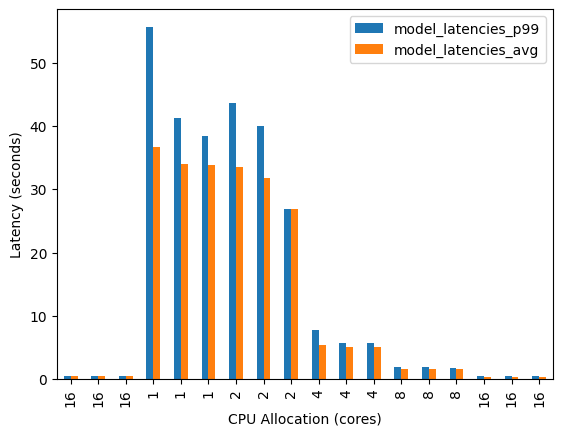

In [11]:
model_variant = 'facebook/s2t-small-librispeech-asr'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")

Text(0, 0.5, 'Latency (seconds)')

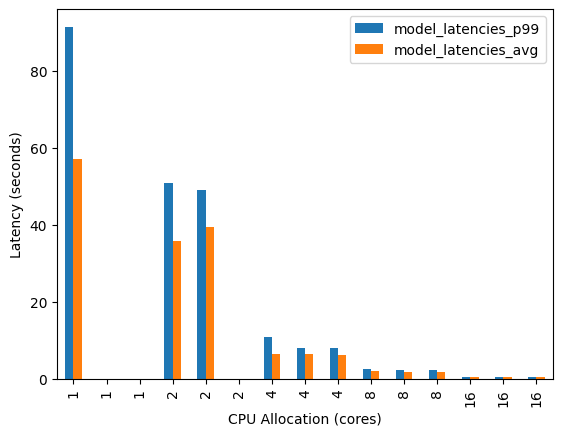

In [12]:
model_variant = 'facebook/s2t-medium-librispeech-asr'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")

<AxesSubplot: xlabel='cpu_request'>

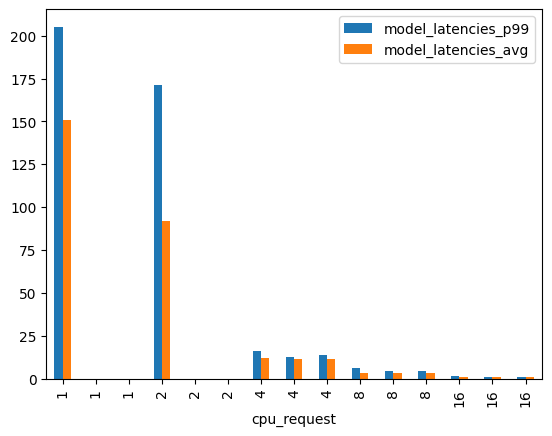

In [13]:
model_variant = 'facebook/s2t-large-librispeech-asr'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

Text(0, 0.5, 'Latency (seconds)')

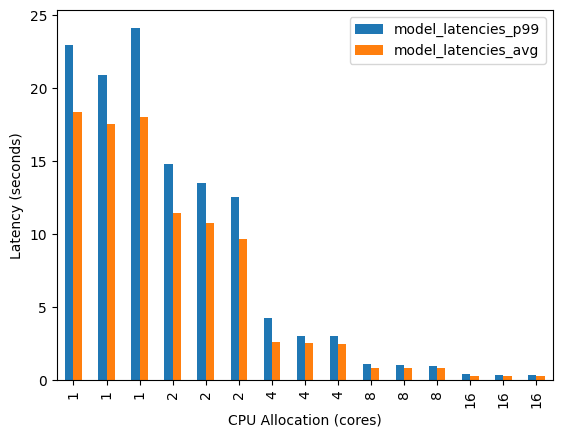

In [14]:
model_variant = 'facebook/wav2vec2-base-960h'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'facebook/wav2vec2-base-960h']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (cores)")
ax.set_ylabel("Latency (seconds)")

<AxesSubplot: xlabel='cpu_request'>

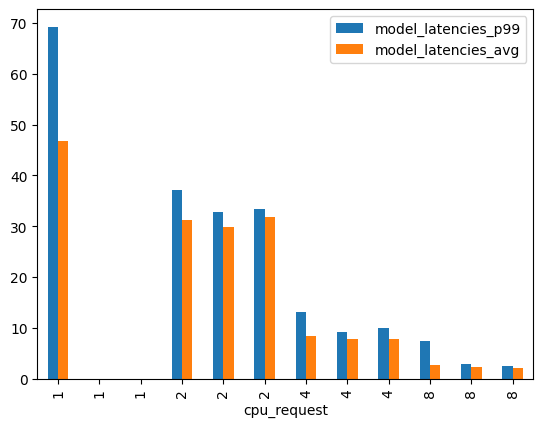

In [15]:
model_variant = 'facebook/wav2vec2-large-960h'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/s2t-small-librispeech-asr,1,60Gi,55.665423,358.641004,36.612448
1,facebook/s2t-small-librispeech-asr,1,60Gi,41.338968,1347.242021,34.017163
2,facebook/s2t-small-librispeech-asr,1,60Gi,38.391674,2726.111869,33.912123
3,facebook/s2t-medium-librispeech-asr,1,60Gi,91.513285,621.563973,57.067115
4,facebook/s2t-medium-librispeech-asr,1,60Gi,NaN,1999.900936,NaN
5,facebook/s2t-medium-librispeech-asr,1,60Gi,NaN,3380.758104,NaN
6,facebook/s2t-large-librispeech-asr,1,60Gi,205.021402,667.598306,151.056699
7,facebook/s2t-large-librispeech-asr,1,60Gi,NaN,2048.871215,NaN
8,facebook/s2t-large-librispeech-asr,1,60Gi,NaN,3432.165223,NaN
9,facebook/wav2vec2-base-960h,1,60Gi,23.005515,568.769281,18.401227


Text(0, 0.5, 'Latency (seconds)')

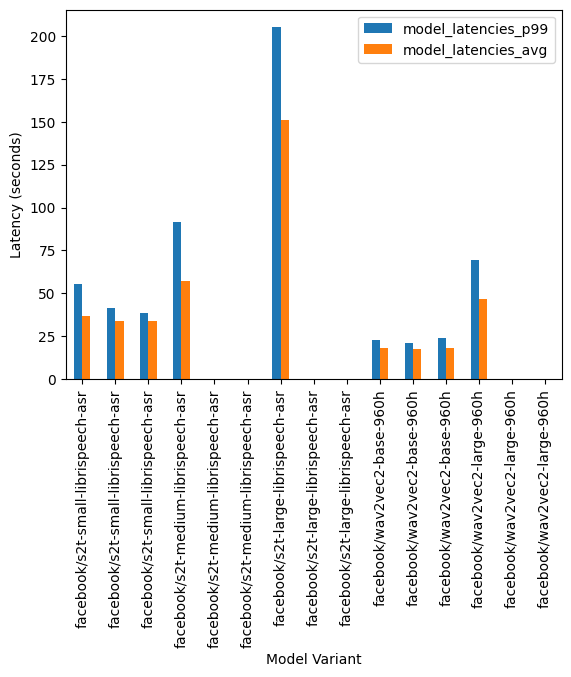

In [16]:
cpu_request = 1
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == cpu_request]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model Variant")
ax.set_ylabel("Latency (seconds)")

,model_variant,memory_usage_max
0,facebook/s2t-small-librispeech-asr,9.485353e+08
1,facebook/s2t-small-librispeech-asr,1.189241e+09
2,facebook/s2t-small-librispeech-asr,1.312027e+09
3,facebook/s2t-medium-librispeech-asr,1.546699e+09
4,facebook/s2t-medium-librispeech-asr,1.765937e+09
5,facebook/s2t-medium-librispeech-asr,1.959481e+09
6,facebook/s2t-large-librispeech-asr,3.796365e+09
7,facebook/s2t-large-librispeech-asr,3.416846e+09
8,facebook/s2t-large-librispeech-asr,3.719926e+09
9,facebook/wav2vec2-base-960h,1.795518e+09


Text(0, 0.5, 'Memory Usage (Mb)')

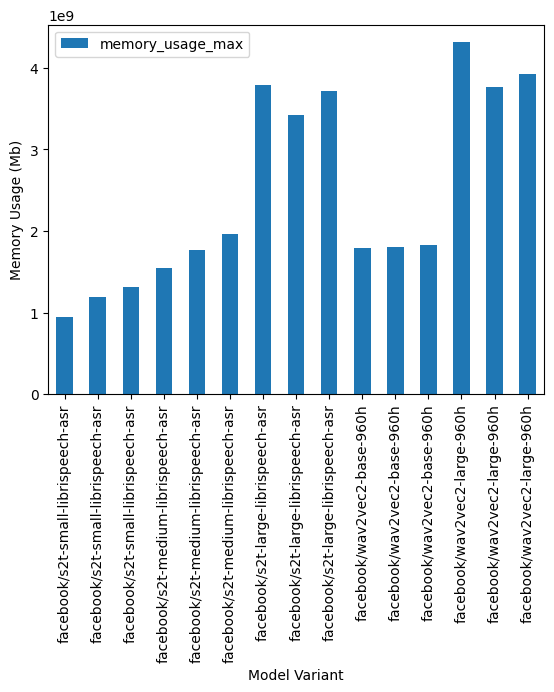

In [17]:
cpu_request = 1
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == cpu_request]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['memory_usage_max'])
ax.set_xlabel("Model Variant")
ax.set_ylabel("Memory Usage (Mb)")